In [70]:
setwd("C:/Users/Gabri/OneDrive/Documents/SMU/Data/DS7333")

In [71]:
getwd()

[1] "C:/Users/Gabri/OneDrive/Documents/SMU/Data/DS7333"

### Q.7 Follow the approach developed in Section 2.2 to read the files for the female runners and then process them using the functions in Section 2.3 to create a data frame for analysis. You may need to generalize the createDF() and extractVariables() functions to handle additional oddities in the raw text files.

Create a function to extract the columns so we can apply it to each year’s data. This function calls our helper functions findColLocs() and selectCols(). 

In [72]:
femalefilenames = paste("C:/Users/Gabri/OneDrive/Documents/SMU/Data/DS7333/", 1999:2012, ".txt", sep = "")

In [73]:
femaleFiles = lapply(femalefilenames, readLines)

Warning message in FUN(X[[i]], ...):
"incomplete final line found on 'C:/Users/Gabri/OneDrive/Documents/SMU/Data/DS7333/1999.txt'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on 'C:/Users/Gabri/OneDrive/Documents/SMU/Data/DS7333/2000.txt'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on 'C:/Users/Gabri/OneDrive/Documents/SMU/Data/DS7333/2001.txt'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on 'C:/Users/Gabri/OneDrive/Documents/SMU/Data/DS7333/2002.txt'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on 'C:/Users/Gabri/OneDrive/Documents/SMU/Data/DS7333/2003.txt'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on 'C:/Users/Gabri/OneDrive/Documents/SMU/Data/DS7333/2004.txt'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on 'C:/Users/Gabri/OneDrive/Documents/SMU/Data/DS7333/2005.txt'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on 'C:/Users/Gabri/OneDr

In [74]:
names(femaleFiles) = 1999:2012

In [75]:
findColLocs = function(spacerRow) {
  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)
  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}

In [76]:
selectCols = function(shortColNames, headerRow, searchLocs) {
  sapply(shortColNames, function(shortName, headerRow, searchLocs){
    startPos = regexpr(shortName, headerRow)[[1]]
    if (startPos == -1) return( c(NA, NA) )
    index = sum(startPos >= searchLocs)
    c(searchLocs[index] + 1, searchLocs[index + 1])
  }, headerRow = headerRow, searchLocs = searchLocs )
}

In [77]:
extractVariables = 
  function(file, varNames =c("name", "home", "ag", "gun",
                             "net", "time"))
{
       # Find the index of the row with =s
  eqIndex = grep("^===", file)
       # Extract the two key rows and the data
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
       
       # Obtain the starting and ending positions of variables
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)

  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  invisible(Values)
}

In [78]:
femaleResMat = lapply(femaleFiles, extractVariables)
length(femaleResMat)

ERROR: Error in 1:eqIndex: argument of length 0


This function errors out due to the 2000 and 2001 not having the *====* in the of the file. The mens files does, so we will take the *==* from a mens file and place it into the females 2000 and 2001 files. 

In [79]:
femaleFiles[['2001']][1:15]

[1] "Nortel Networks Cherry Blossom 10mile Road Race"                         
 [2] "Washington, DC *** April 8, 2001"                                        
 [3] "| Men | Women | "                                                        
 [4] "Official Results - WOMEN "                                               
 [5] " *** Gun Time is the Official Time "                                     
 [6] ""                                                                        
 [7] "                                                                 "       
 [8] "                      "                                                  
 [9] "    1  6002 Elana MEYER           34 Rep Of S.africa      52:15   52:16#"
[10] "    2  6004 Lydia GRIGORIEVA      27 Russia               53:12   53:15#"
[11] "    3  6019 Eyerusalem KUMA       20 Ethiopia             53:16   53:19#"
[12] "    4  6007 Milena GLUSAC         25 Usa                  53:33   53:34#"
[13] "    5  6012 Olga KOVPOTINA        31 Russia               54:01   54:03#"
[14] "    6  6020 Merima HASHIM         20 Ethiopia             54:29   54:31#"
[15] "    7  6005 Jane OMORO            27 Kenya                55:05   55:08#"

In [80]:
men2001 = readLines("C:/Users/Gabri/OneDrive/Documents/SMU/Data/DS7333/men2001.txt")
men2001[1:15]

[1] "Nortel Networks Cherry Blossom 10mile Road Race"                         
 [2] "Washington, DC *** April 8, 2001"                                        
 [3] "| Men | Women |"                                                         
 [4] ""                                                                        
 [5] ""                                                                        
 [6] "Official Results, MEN  "                                                 
 [7] "Gun Time is the Official Time"                                           
 [8] ""                                                                        
 [9] ""                                                                        
[10] " "                                                                       
[11] ""                                                                        
[12] "PLACE NUM   NAME                  AG HOMETOWN           NET     GUN"     
[13] "===== ===== ===================== == ================== ======= =======" 
[14] "    1     4 John KORIR            26 Kenya                46:12   46:12#"
[15] "    2     1 Reuben CHERUIYOT      27 Kenya                46:11   46:13#"

In [81]:
femaleFiles[['2000']][9:10] = men2001[12:13]
femaleFiles[['2000']][1:15]

[1] "Nortel Networks Cherry Blossom 10mile Road Race"                         
 [2] "Washington, DC *** April 8, 2001"                                        
 [3] "| Men | Women | "                                                        
 [4] "Official Results - WOMEN "                                               
 [5] " *** Gun Time is the Official Time "                                     
 [6] ""                                                                        
 [7] "                                                                 "       
 [8] "                      "                                                  
 [9] "PLACE NUM   NAME                  AG HOMETOWN           NET     GUN"     
[10] "===== ===== ===================== == ================== ======= =======" 
[11] "    3  6019 Eyerusalem KUMA       20 Ethiopia             53:16   53:19#"
[12] "    4  6007 Milena GLUSAC         25 Usa                  53:33   53:34#"
[13] "    5  6012 Olga KOVPOTINA        31 Russia               54:01   54:03#"
[14] "    6  6020 Merima HASHIM         20 Ethiopia             54:29   54:31#"
[15] "    7  6005 Jane OMORO            27 Kenya                55:05   55:08#"

In [82]:
femaleFiles[['2001']][9:10] = men2001[12:13]
femaleFiles[['2001']][1:15]

[1] "Nortel Networks Cherry Blossom 10mile Road Race"                         
 [2] "Washington, DC *** April 8, 2001"                                        
 [3] "| Men | Women | "                                                        
 [4] "Official Results - WOMEN "                                               
 [5] " *** Gun Time is the Official Time "                                     
 [6] ""                                                                        
 [7] "                                                                 "       
 [8] "                      "                                                  
 [9] "PLACE NUM   NAME                  AG HOMETOWN           NET     GUN"     
[10] "===== ===== ===================== == ================== ======= =======" 
[11] "    3  6019 Eyerusalem KUMA       20 Ethiopia             53:16   53:19#"
[12] "    4  6007 Milena GLUSAC         25 Usa                  53:33   53:34#"
[13] "    5  6012 Olga KOVPOTINA        31 Russia               54:01   54:03#"
[14] "    6  6020 Merima HASHIM         20 Ethiopia             54:29   54:31#"
[15] "    7  6005 Jane OMORO            27 Kenya                55:05   55:08#"

In [83]:
femaleResMat = lapply(femaleFiles, extractVariables)
length(femaleResMat)

[1] 14

In [84]:
sapply(femaleResMat, nrow)

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
2363 2971 2971 3335 3544 3899 4336 5437 5692 6398 8325 8855 9027 7193

The files have now been read in and the number of rows in each year look reasonable. We are now ready to format the data. We will need to convert the character matrix into a dataframe and then convert each column to a data type for each respective variable. We will start by converting the age column from the 2012 data to numeric values and checking its validity.

In [105]:
age = as.numeric(femaleResMat[['2012']][ , 'ag'])

In [86]:
age = sapply(femaleResMat,
             function(x) as.numeric(x[ , 'ag']))

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"

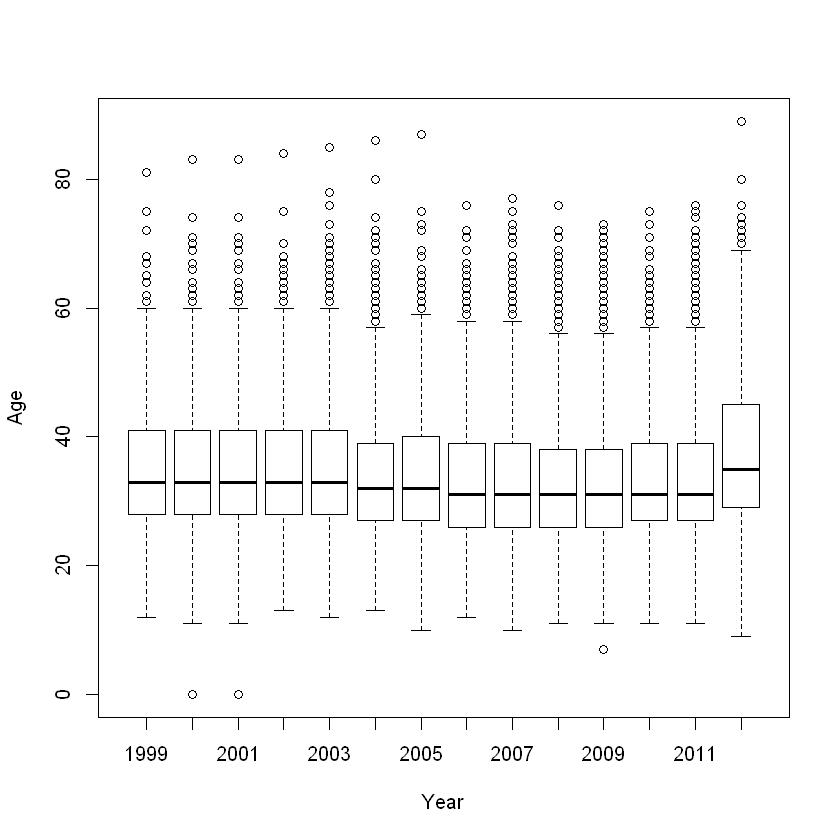

In [140]:
boxplot(age, ylab = "Age", xlab = "Year")

In [123]:
selectCols = function(shortColNames, headerRow, searchLocs) {
  sapply(shortColNames, function(shortName, headerRow, searchLocs){
    startPos = regexpr(shortName, headerRow)[[1]]
    if (startPos == -1) return( c(NA, NA) )
    index = sum(startPos >= searchLocs)
    c(searchLocs[index] + 1, searchLocs[index + 1])
  }, headerRow = headerRow, searchLocs = searchLocs )
}

In [124]:
femaleResMat = lapply(femaleFiles, extractVariables)

In [125]:
age = sapply(femaleResMat, 
             function(x) as.numeric(x[ , 'ag']))

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"

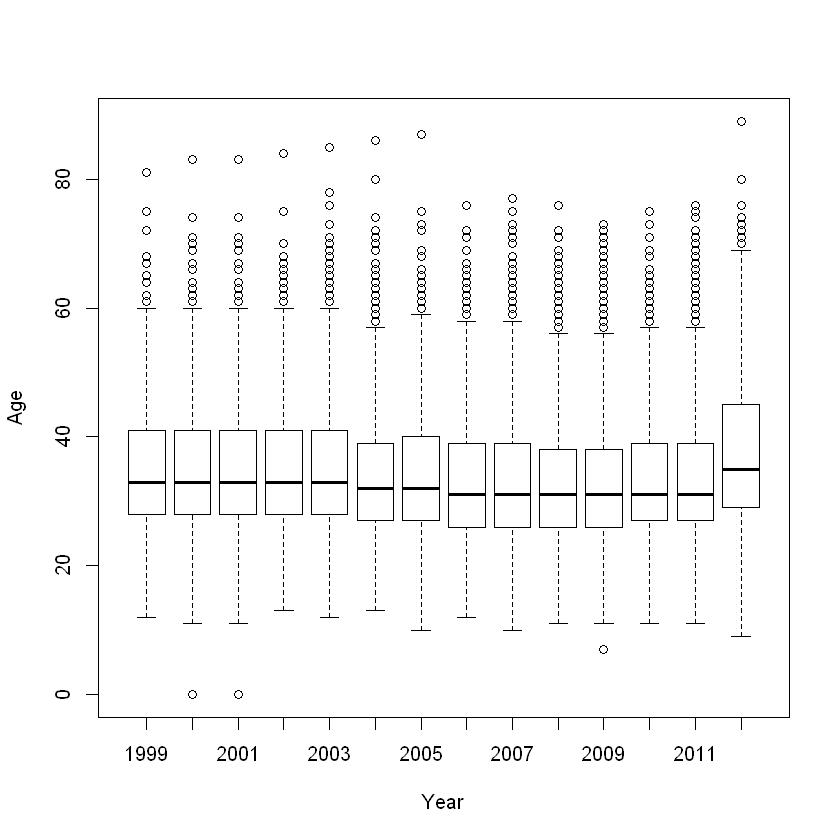

In [126]:
boxplot(age, ylab = "Age", xlab = "Year")

In [127]:
sapply(age,  function(x) sum(is.na(x)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
  11    1    1    5    2    0   11    3    4    1    4    2    0    1

Now we create a function to convert the data from a matrix to a dataframe

In [128]:
convertTime = function(time) {
  timePieces = strsplit(time, ":")
  timePieces = sapply(timePieces, as.numeric)
  sapply(timePieces, function(x) {
                      if (length(x) == 2) x[1] + x[2]/60
                      else 60*x[1] + x[2] + x[3]/60
                      })
}

In [129]:
createDF =
function(Res, year, sex)
{
       # Determine which time to use
  useTime = if( !is.na(Res[1, "net"]) )
              Res[ , "net"]
            else if( !is.na(Res[1, "gun"]) )
               Res[ , "gun"]
            else
               Res[ , "time"]
  runTime = convertTime(useTime)
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , "name"],
                       home = Res[ , "home"],
                       age = as.numeric(Res[, "ag"]),
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

In [130]:
femaleDF = mapply(createDF, femaleResMat, year = 1999:2012,
                   sex = rep("W", 14), SIMPLIFY = FALSE)

Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X 

The above function call produces warnings about "*NAs introduced by coercion*". It is likely coming from the time conversion. 

In [131]:
sapply(femaleDF, function(x) sum(is.na(x$runTime)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   7    1    1    1    2    0    3 5433  194    1  117  109    0    0

 There are a large number of NAs in 2007, 2009, and 2010, and that all of the run time values for 2006 are NA. Let’s begin by examining a few of the records in 2007, 2009, and 2010 that have an NA in run time. We find that these are caused by runners who completed half the race but have no final times and by runners who have a footnote after their time. We have to modify our createDF() fucnton to eliminate the footnote smybols(# and *) .

In [132]:
createDF = function(Res, year, sex) 
{
  # Determine which time to use
  if ( !is.na(Res[1, 'net']) ) useTime = Res[ , 'net']
  else if ( !is.na(Res[1, 'gun']) ) useTime = Res[ , 'gun']
  else useTime = Res[ , 'time']
  
  # Remove # and * and blanks from time
  useTime = gsub("[#\\*[:blank:]]", "", useTime)
  runTime = convertTime(useTime[ useTime != "" ])
  
  # Drop rows with no time
  Res = Res[ useTime != "", ]
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'], home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

Now we will reconstruct the dataframes and recheck the number of null runtime values.

In [133]:
femaleDF = mapply(createDF, femaleResMat, year = 1999:2012,
                   sex = rep("W", 14), SIMPLIFY = FALSE)

Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X 

In [134]:
sapply(femaleDF, function(x) sum(is.na(x$runTime)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    1    1    1    0    0    0 5431    0    0    0    0    0    0

Finally, we combine the race results for all years and females into one data frame using the do.call() function to call rbind() with the list of data frames as input. The do.call() function is very convenient when we have the individual arguments to a function as elements of a list.

In [135]:
cbFemale = do.call(rbind, femaleDF)
save(cbFemale, file = "cbFemale.rda")

In [136]:
dim(cbFemale)

[1] 74237     6

In [137]:
head(cbFemale)

,year,sex,name,home,age,runTime
1999.1,1999,W,Jane Omoro,Kenya,26,53.61667
1999.2,1999,W,Jane Ngotho,Kenya,29,53.63333
1999.3,1999,W,Lidiya Grigoryeva,Russia,NA,53.66667
1999.4,1999,W,Eunice Sagero,Kenya,20,53.91667
1999.5,1999,W,Alla Zhilyayeva,Russia,29,54.13333
1999.6,1999,W,Teresa Wanjiku,Kenya,24,54.16667


In [138]:
str(cbFemale)

'data.frame':	74237 obs. of  6 variables:
 $ year   : int  1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 ...
 $ sex    : chr  "W" "W" "W" "W" ...
 $ name   : chr  "Jane Omoro            " "Jane Ngotho           " "Lidiya Grigoryeva     " "Eunice Sagero         " ...
 $ home   : chr  "Kenya              " "Kenya              " "Russia             " "Kenya              " ...
 $ age    : num  26 29 NA 20 29 24 38 NA 27 30 ...
 $ runTime: num  53.6 53.6 53.7 53.9 54.1 ...


Overall, 74,237 female runners completed the Cherry Blossom race compared to 70,070 male runners in the same time period. 

In [139]:
summary(cbFemale)

      year          sex                name               home          
 Min.   :1999   Length:74237       Length:74237       Length:74237      
 1st Qu.:2004   Class :character   Class :character   Class :character  
 Median :2008   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2007                                                           
 3rd Qu.:2010                                                           
 Max.   :2012                                                           
                                                                        
      age           runTime      
 Min.   : 0.00   Min.   : 45.25  
 1st Qu.:27.00   1st Qu.: 87.25  
 Median :32.00   Median : 96.35  
 Mean   :34.21   Mean   : 96.93  
 3rd Qu.:40.00   3rd Qu.:105.97  
 Max.   :89.00   Max.   :177.52  
 NA's   :25      NA's   :5434    